In [4]:
!pip install tensorflow


In [7]:
pip install setuptools


In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
# Read in the data
data = pd.read_csv('C:\\Users\\HP\\Documents\\RetailShop\\Cleaned_SalesDataSet.csv')

In [3]:
data.columns


Index(['Date', 'shop_id', 'product_id', 'product_name', 'Units_Sold',
       'revenue_(zar)', 'sales_period_(daily/weekly)', 'is_weekend'],
      dtype='object')

In [4]:
data

,Date,shop_id,product_id,product_name,Units_Sold,revenue_(zar),sales_period_(daily/weekly),is_weekend
0,1/2/2024,SP001,P002,Milk,50,500.0,Daily,Weekday
1,1/3/2024,SP002,P003,Soap,30,300.0,Daily,Weekday
2,1/4/2024,SP001,P004,Sugar,40,400.0,Daily,Weekday
3,1/6/2024,SP002,P002,Milk,60,600.0,Daily,Weekend
4,1/7/2024,SP002,P003,Soap,35,350.0,Daily,Weekend
...,...,...,...,...,...,...,...,...
70,3/13/2024,SP001,P003,Soap,36,659.0,Daily,Weekday
71,3/14/2024,SP002,P004,Sugar,37,678.0,Daily,Weekday
72,3/15/2024,SP001,P001,Bread,39,697.0,Weekly,Weekday
73,3/16/2024,SP001,P002,Milk,40,716.0,Daily,Weekend


In [5]:
data.head()

,Date,shop_id,product_id,product_name,Units_Sold,revenue_(zar),sales_period_(daily/weekly),is_weekend
0,1/2/2024,SP001,P002,Milk,50,500.0,Daily,Weekday
1,1/3/2024,SP002,P003,Soap,30,300.0,Daily,Weekday
2,1/4/2024,SP001,P004,Sugar,40,400.0,Daily,Weekday
3,1/6/2024,SP002,P002,Milk,60,600.0,Daily,Weekend
4,1/7/2024,SP002,P003,Soap,35,350.0,Daily,Weekend


using panda's datetime function so we'll set the index which is going to be basically the date column setting this index equal to the pandas dot to date time

In [6]:
data.index = pd.to_datetime(data['Date'], format='%m/%d/%Y')


Grabbing the units_sold column since its the one a focusing on and placing it in a temp variable.

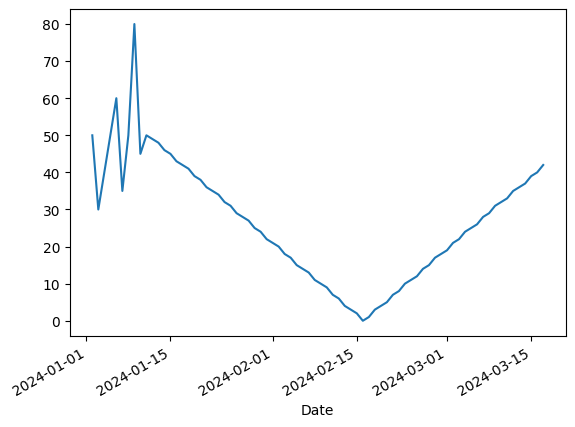

In [10]:
import matplotlib.pyplot as plt
temp = data['Units_Sold']
temp.plot()
plt.show()


In [11]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
#
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70, 5, 1), (70,))

In [13]:
# split this into train, tests and validation sets
X_train1, y_train1 = X1[:60], y1[:60]  # 60 stands for the number of rows from the data.
X_val1, y_val1 = X1[60:65], y1[60:65] # 60 to 65 rows
X_test1, y_test1 = X1[65:], y1[65:]  # giving the rest to test
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60, 5, 1), (60,), (5, 5, 1), (5,), (5, 5, 1), (5,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [15]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear')) #we want a linear value we're trying to predict some numbers which is going to be apositive or negative value so we just want that to be linear 

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#specify our training callbacks
cp1 = ModelCheckpoint('model1/best_model.keras', save_best_only=True)
#what i did here is set save best only equal to true which means i want to only save the best model 
#which is going to be defined automaticallyby saying the one that has the lowest validation loss
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Fitting

In [17]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 628ms/step - loss: 768.5269 - root_mean_squared_error: 27.6876 - val_loss: 1052.2153 - val_root_mean_squared_error: 32.4379
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 849.9937 - root_mean_squared_error: 29.1462 - val_loss: 1050.8542 - val_root_mean_squared_error: 32.4169
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 859.4435 - root_mean_squared_error: 29.3010 - val_loss: 1049.4939 - val_root_mean_squared_error: 32.3959
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 814.6598 - root_mean_squared_error: 28.5421 - val_loss: 1048.1366 - val_root_mean_squared_error: 32.3749
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 856.8177 - root_mean_squared_error: 29.2566 - val_loss: 1046.7805 - val_root_mean_squared_error: 32.3540
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 715.3986 - root_mean_squared_error: 26.6002 - val_loss: 1045.4374 - val_root_mean_squared_error: 32.3332
Epoch 7/10
2/2 ━━━━━━━━━━━━

In [18]:
from tensorflow.keras.models import load_model
#loading back the model that had the lowest validation loss
model1 = load_model('model1/best_model.keras')

In [19]:
# Making 3 pandas data frame for train, test and validation

In [20]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


,Train Predictions,Actuals
0,-0.167266,50
1,-0.195816,80
2,-0.198214,45
3,-0.169108,50
4,-0.181747,49
5,-0.174475,48
6,-0.173345,46
7,-0.179626,45
8,-0.178339,43
9,-0.177540,42


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


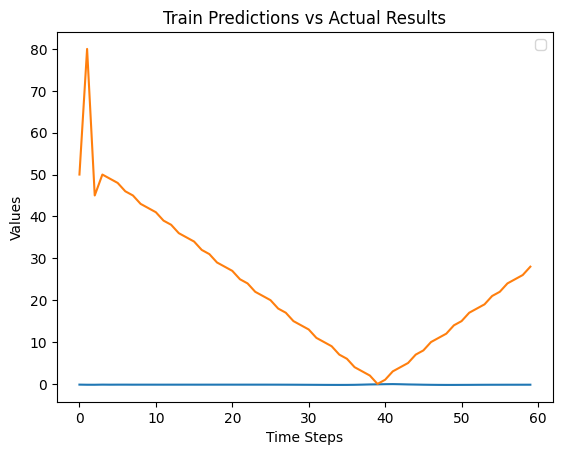

In [27]:
import matplotlib.pyplot as plt
#the predictions compared to the actual results train results 
plt.plot(train_results['Train Predictions'][:60]) #Showing the first 60 rows of Train Predictions
plt.plot(train_results['Actuals'][:60])           #Showing the first 60 rows of Actuals

# Adding legend to distinguish between the two lines
plt.legend()

# Optionally, you can add titles and axis labels
plt.title('Train Predictions vs Actual Results')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.show()

In [22]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


,Val Predictions,Actuals
0,-0.188761,29
1,-0.187169,31
2,-0.188602,32
3,-0.187383,33
4,-0.186506,35


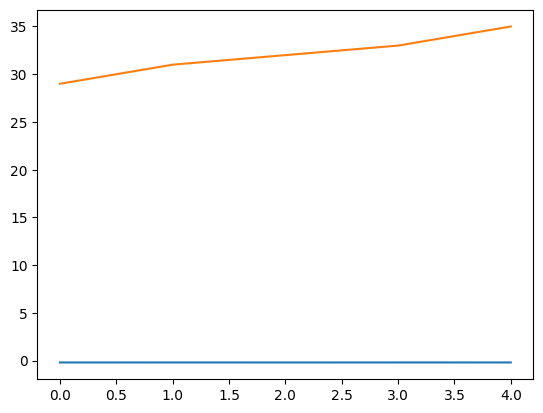

In [23]:
plt.plot(val_results['Val Predictions'][:100])  #Showing the first 60 rows of Val Predictions
plt.plot(val_results['Actuals'][:100])



In [24]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


,Test Predictions,Actuals
0,-0.188142,36
1,-0.187274,37
2,-0.186938,39
3,-0.188318,40
4,-0.187486,42


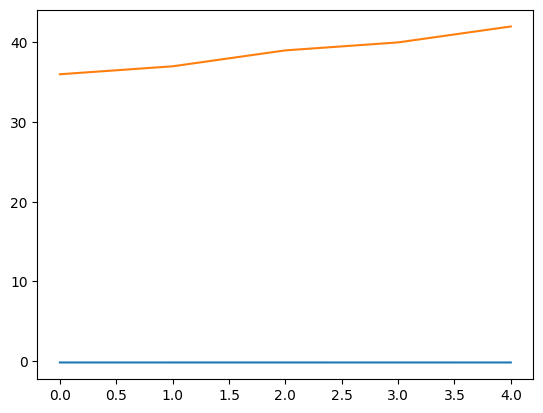

In [25]:
plt.plot(test_results['Test Predictions'][:60]) #Showing the first 60 rows of Test Predictions
plt.plot(test_results['Actuals'][:60])